In [1]:
import numpy as np
seed=7
np.random.seed(seed)

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
from keras.constraints import maxnorm
from keras import optimizers

In [18]:
from keras.models import load_model

In [19]:
# Function to create model, required for KerasClassifier
def create_model1(neurons=neurons):
    model1 = Sequential()
    model1.add(Dense(neurons, input_dim=9, activation='relu'))
    model1.add(Dense(1, activation='sigmoid'))
    adm = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model1.compile(loss='binary_crossentropy', optimizer=adm, metrics=['accuracy'])
    return model1

NameError: name 'neurons' is not defined

In [5]:
model=create_model1()

In [6]:
model.save_weights('my_model_weights.h5')

In [7]:
import pandas as pd
df = pd.read_csv("wbc.csv")

In [8]:
df=df.replace('?',np.nan)
df['bare_nuclei'] = pd.to_numeric(df.bare_nuclei.fillna(df.bare_nuclei.median()))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
clump_thickness       699 non-null int64
cell_size             699 non-null int64
cell_shape            699 non-null int64
marginal_adhesion     699 non-null int64
epitelial_cellsize    699 non-null int64
bare_nuclei           699 non-null float64
bland_chromatin       699 non-null int64
normal_nucleoli       699 non-null int64
mitoses               699 non-null int64
jenis                 699 non-null int64
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [9]:
X = df.drop([df.columns[-1]], axis=1)
y = df.jenis.map({2: 0, 4: 1})

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

In [11]:
model1 = KerasClassifier(build_fn=create_model1, class_weight=None, verbose=0)

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
neurons2 = [9,18,27,36,45,54,63,72,81]

In [21]:
results=[]
model.load_weights('my_model_weights.h5')

for neurons_idx in range(len(neurons2)):
    param1 = neurons2[neurons_idx]
    def create_model1():
        model1 = Sequential()
        model1.add(Dense(param1, input_dim=9, activation='relu'))
        model1.add(Dense(1, activation='sigmoid'))
        adm = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
        model1.compile(loss='binary_crossentropy', optimizer=adm, metrics=['accuracy'])
        return model1
    bestmodelNN = KerasClassifier(build_fn=create_model1,  verbose=0)
    model.load_weights('my_model_weights.h5')
    print("Jumlah Hidden Units : %r)" % (param1))
    scores2=cross_val_score(bestmodelNN,X_train.as_matrix(),y_train,cv=10,scoring='accuracy')
    print("Accuracy: %0.4f (+/- %0.4f)" % (scores2.mean(), scores2.std() ))
    results.append(scores2.mean())
    print()
    print()


Jumlah Hidden Units : 9)
Accuracy: 0.9441 (+/- 0.0416)


Jumlah Hidden Units : 18)
Accuracy: 0.9442 (+/- 0.0312)


Jumlah Hidden Units : 27)
Accuracy: 0.9550 (+/- 0.0206)


Jumlah Hidden Units : 36)
Accuracy: 0.9593 (+/- 0.0294)


Jumlah Hidden Units : 45)
Accuracy: 0.9593 (+/- 0.0180)


Jumlah Hidden Units : 54)
Accuracy: 0.9593 (+/- 0.0264)


Jumlah Hidden Units : 63)
Accuracy: 0.9549 (+/- 0.0283)


Jumlah Hidden Units : 72)
Accuracy: 0.9635 (+/- 0.0275)


Jumlah Hidden Units : 81)
Accuracy: 0.9572 (+/- 0.0358)




In [22]:
results

[0.94412580943570779,
 0.94421831637372799,
 0.95499537465309903,
 0.95934320074005552,
 0.95929694727104542,
 0.95925069380203509,
 0.95494912118408881,
 0.96350601295097127,
 0.95716928769657716]

In [23]:
dfb = pd.read_csv("wbc.csv")
dfb=dfb[dfb.bare_nuclei!='?']
dfb['bare_nuclei']=dfb['bare_nuclei'].astype(object).astype(int)

In [24]:
A = dfb.drop([dfb.columns[-1]], axis=1)
b = dfb.jenis.map({2: 0, 4: 1})

In [25]:
from sklearn.model_selection import train_test_split
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.33, random_state=seed)

In [27]:
results2=[]
model.load_weights('my_model_weights.h5')

for neurons_idx in range(len(neurons2)):
    param1 = neurons2[neurons_idx]
    def create_model1():
        model1 = Sequential()
        model1.add(Dense(param1, input_dim=9, activation='relu'))
        model1.add(Dense(1, activation='sigmoid'))
        adm = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
        model1.compile(loss='binary_crossentropy', optimizer=adm, metrics=['accuracy'])
        return model1
    bestmodelNN = KerasClassifier(build_fn=create_model1,  verbose=0)
    model.load_weights('my_model_weights.h5')
    print("Jumlah Hidden Units : %r" % (param1))
    scores2b=cross_val_score(bestmodelNN,A_train.as_matrix(),b_train,cv=10,scoring='accuracy')
    print("Accuracy: %0.4f (+/- %0.4f)" % (scores2b.mean(), scores2b.std() ))
    results2.append(scores2b.mean())
    print()
    print()

Jumlah Hidden Units : 9
Accuracy: 0.9606 (+/- 0.0215)


Jumlah Hidden Units : 18
Accuracy: 0.9540 (+/- 0.0250)


Jumlah Hidden Units : 27
Accuracy: 0.9496 (+/- 0.0222)


Jumlah Hidden Units : 36
Accuracy: 0.9540 (+/- 0.0316)


Jumlah Hidden Units : 45
Accuracy: 0.9518 (+/- 0.0236)


Jumlah Hidden Units : 54
Accuracy: 0.9561 (+/- 0.0198)


Jumlah Hidden Units : 63
Accuracy: 0.9475 (+/- 0.0261)


Jumlah Hidden Units : 72
Accuracy: 0.9607 (+/- 0.0212)


Jumlah Hidden Units : 81
Accuracy: 0.9628 (+/- 0.0294)




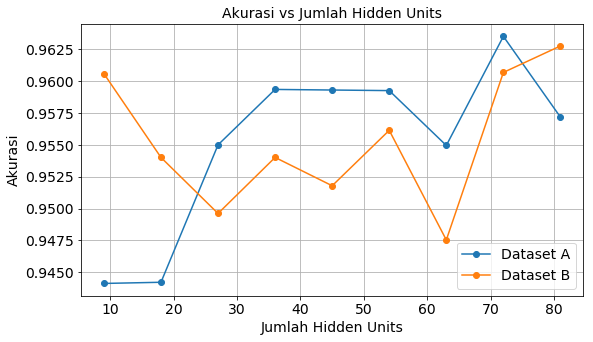

In [31]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(neurons2, results, marker='o', label='Dataset A')
ax.plot(neurons2, results2, marker='o',  label='Dataset B')
plt.title("Akurasi vs Jumlah Hidden Units",fontsize=14)
plt.xlabel('Jumlah Hidden Units',fontsize=14)
plt.ylabel('Akurasi',fontsize=14)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.legend(prop={'size':14})
plt.grid(True)
plt.show()

c:\users\annisa\anaconda3\envs\py35\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


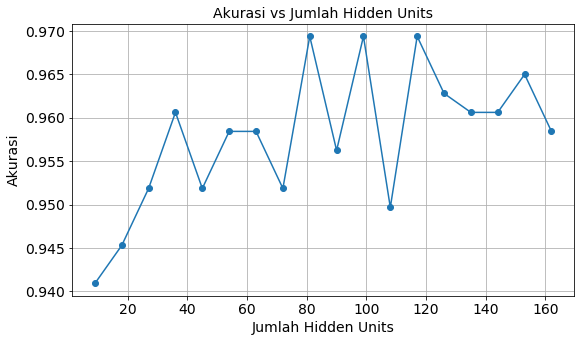

In [32]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(9,5))
plt.plot(neurons, means3, marker='o')
plt.title("Akurasi vs Jumlah Hidden Units",fontsize=14)
plt.xlabel('Jumlah Hidden Units',fontsize=14)
plt.ylabel('Akurasi',fontsize=14)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.legend(prop={'size':14})
plt.grid(True)
plt.show()

In [33]:
print(__doc__)


scores = ['accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf4 = GridSearchCV(estimator=model, param_grid=param_grid2, cv=10, 
                       scoring='accuracy')
    clf4.fit(A_train.as_matrix(), b_train)

    print("Best parameters set found on development set:")
    print()
    print(clf4.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means4 = clf4.cv_results_['mean_test_score']
    stds4 = clf4.cv_results_['std_test_score']
    for mean, std, params in zip(means4, stds4, clf4.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
    


Automatically created module for IPython interactive environment
# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'neurons': 63}

Grid scores on development set:

0.950 (+/-0.062) for {'neurons': 9}
0.961 (+/-0.061) for {'neurons': 18}
0.947 (+/-0.065) for {'neurons': 27}
0.961 (+/-0.070) for {'neurons': 36}
0.961 (+/-0.101) for {'neurons': 45}
0.954 (+/-0.056) for {'neurons': 54}
0.967 (+/-0.065) for {'neurons': 63}
0.947 (+/-0.123) for {'neurons': 72}
0.956 (+/-0.070) for {'neurons': 81}



c:\users\annisa\anaconda3\envs\py35\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


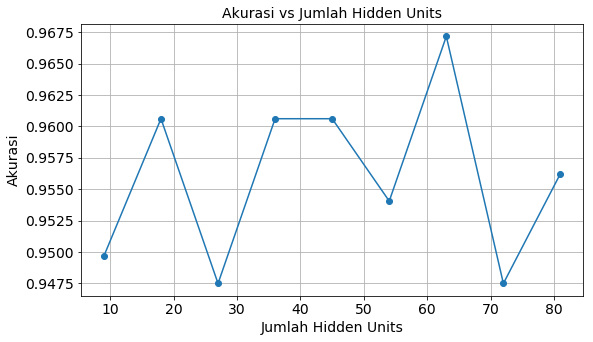

In [34]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(9,5))
plt.plot(neurons2, means4, marker='o')
plt.title("Akurasi vs Jumlah Hidden Units",fontsize=14)
plt.xlabel('Jumlah Hidden Units',fontsize=14)
plt.ylabel('Akurasi',fontsize=14)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.legend(prop={'size':14})
plt.grid(True)
plt.show()

In [35]:
means

array([ 0.94017094,  0.94444444,  0.94871795,  0.9508547 ,  0.94871795,
        0.96367521,  0.96153846,  0.94871795,  0.95512821,  0.96153846,
        0.96367521,  0.95512821,  0.96153846,  0.94017094,  0.96367521,
        0.94871795,  0.96581197,  0.96581197])

In [36]:
means3

array([ 0.94091904,  0.9452954 ,  0.95185996,  0.96061269,  0.95185996,
        0.95842451,  0.95842451,  0.95185996,  0.96936543,  0.95623632,
        0.96936543,  0.94967177,  0.96936543,  0.96280088,  0.96061269,
        0.96061269,  0.96498906,  0.95842451])

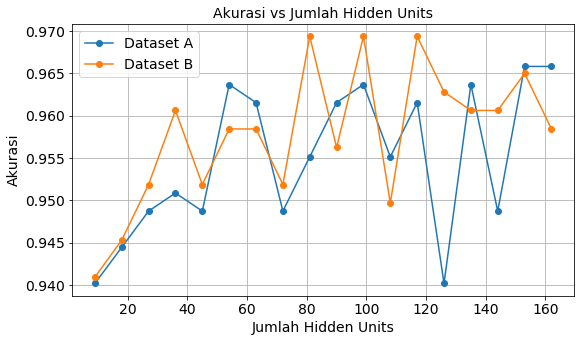

In [37]:
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(neurons, means, marker='o', label='Dataset A')
ax.plot(neurons, means3, marker='o',  label='Dataset B')
plt.title("Akurasi vs Jumlah Hidden Units",fontsize=14)
plt.xlabel('Jumlah Hidden Units',fontsize=14)
plt.ylabel('Akurasi',fontsize=14)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.legend(prop={'size':14})
plt.grid(True)
plt.show()

In [47]:
means2.shape

(9,)

In [51]:
means81=means2

In [48]:
means4.shape

(9,)

In [2]:
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(neurons2, means2, marker='o', color='blue', label='Dataset A')
ax.plot(neurons2, means4, marker='o', color='orange', label='Dataset B')
plt.title("Akurasi vs Jumlah Hidden Units",fontsize=14)
plt.xlabel('Jumlah Hidden Units',fontsize=14)
plt.ylabel('Akurasi',fontsize=14)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.legend(prop={'size':14})
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

In [55]:
X_train.count()

clump_thickness       468
cell_size             468
cell_shape            468
marginal_adhesion     468
epitelial_cellsize    468
bare_nuclei           468
bland_chromatin       468
normal_nucleoli       468
mitoses               468
dtype: int64